#              Assignment 2    
## Question 1

- Learn and understand Zipf’s Law.
- Pick any file (or files) in NLTK package.
- Prove if Zipf’s Law works in Natural Language or not.  REQUIREMNTS: (Must Do)
- Use ’glob’ to open and read file. If read multiple files use LOOP to achieve.
- Create at least one function and one lambda function.
- Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK. 
- Open your CSV file, generate a log-log figure according to the data you saved.
- Write a conclusion at the end of your code base on your figure.

In [1]:
# import packages 
from nltk.corpus import webtext
import matplotlib.pyplot as plt
import glob
import csv
import re
import string

In [2]:
words=[] 
words_freq={}
file_list= glob.glob("nltk_data/corpora/webtext/*.txt") # use glob to open the files
for file in file_list: 
    with open(file,'r',encoding='utf-8',errors='ignore') as f: #open the file in read mode
        readfile=f.read() #read the contents of the file
        lower_words=readfile.lower() # lower the contents of the file
        string_to_words = re.sub('['+string.punctuation+']', '', lower_words).split()#convert string to words 
    for word in string_to_words:
        if word.isalpha(): #remove punctuations
            if word not in words_freq:
                words_freq[word] = 1  #checking if the word is available in the dictionary
            else:
                words_freq[word] += 1 # for existing words, increment by 1
sorted_words=sorted(words_freq.items(), key=lambda x: x[1], reverse=True)# sort the words 
print("Top words and their frequencies are: ")
sorted_words[:50] # display ten most frequently used words
        

Top words and their frequencies are: 


[('the', 5987),
 ('i', 5802),
 ('you', 4982),
 ('a', 4961),
 ('to', 4171),
 ('and', 3557),
 ('girl', 2945),
 ('guy', 2735),
 ('of', 2312),
 ('it', 2134),
 ('that', 2096),
 ('on', 2056),
 ('in', 2035),
 ('is', 1996),
 ('like', 1555),
 ('my', 1479),
 ('so', 1332),
 ('but', 1330),
 ('this', 1268),
 ('have', 1267),
 ('me', 1264),
 ('with', 1240),
 ('for', 1181),
 ('was', 1179),
 ('im', 1137),
 ('not', 1137),
 ('what', 1125),
 ('dont', 1093),
 ('no', 1085),
 ('man', 1046),
 ('its', 1033),
 ('know', 1002),
 ('just', 1001),
 ('woman', 991),
 ('your', 967),
 ('are', 947),
 ('be', 937),
 ('he', 901),
 ('do', 886),
 ('yeah', 837),
 ('get', 781),
 ('at', 781),
 ('all', 744),
 ('chick', 714),
 ('we', 697),
 ('if', 683),
 ('up', 665),
 ('they', 663),
 ('oh', 650),
 ('she', 642)]

In [3]:
def filewrite(): #define a method filewrite
    count=1
    csvfile=open('assign2.csv', 'w',newline="")#open the csvfile
    writer=csv.writer(csvfile)  #write the csv file using writer
    writer.writerow(['Words','Frequency','Rank']) #writer to write the row
    for words in sorted_words:
        writer.writerow([words[0],words[1],count]) #write the header
        count+=1
    csvfile.close()#close the file

In [4]:
filewrite() #calling the function filewrite 

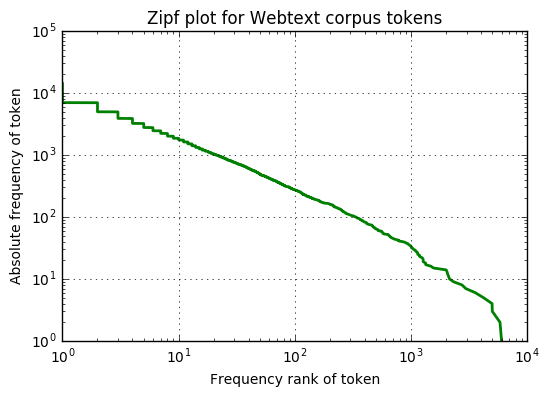

In [5]:
csvfile=open('assign2.csv', 'r') # open csv file
w=[] #declare lists for words, frequency and ranks
f=[]
r=[]
csv_f=csv.reader(csvfile) #read the csv file using reader
for row in csv_f:
    w.append(row[0]) #append the 0th element in the list of row
    f.append(row[1]) #append the 1st element in the list of row
    r.append(row[2]) #append the 2nd element in the list of row
r.pop(0) #pop out the 0th element in the list of rank, because it's a string header
f.pop(0) #pop out the 1st element in the list of rank, because it's a string header
plt.loglog(f,r,color='g',linewidth=2) #plot loglog graph
plt.grid(True)
plt.title("Zipf plot for Webtext corpus tokens")
plt.xlabel("Frequency rank of token")
plt.ylabel("Absolute frequency of token")
plt.show() 

# Proof Zipf's Law: Conclusion

**It's evident from the loglog graph that the plot between frequency and rank of words prove the Ziph's law**

!['Words, Rank, Frequency'](img/Rank.png)